# 对数几率回归
- 几率：$\frac y{1 - y}$
- 对数几率：$\ln\frac y{1 - y}$
$$y = \frac1{1 + e^{-z}} = \frac1{1 + e^{-(\mathbf\omega^\top\mathbf x + b)}} \Rightarrow \ln\frac y{1 - y} = \mathbf\omega^\top\mathbf x + b \Rightarrow \ln\frac {p(y = 1 | \mathbf x)}{p(y = 0 | \mathbf x)} = \mathbf\omega^\top\mathbf x + b \Rightarrow
\begin{cases}
    p(y = 1 | \mathbf x) = \frac{e^{\mathbf\omega^\top\mathbf x + b}}{1 + e^{\mathbf\omega^\top\mathbf x + b}} \\
    p(y = 0 | \mathbf x) = \frac1{1 + e^{\mathbf\omega^\top\mathbf x + b}}
\end{cases}
\Rightarrow l(\mathbf\omega, b) = \sum_{i = 1}^m \ln p(y_i | \mathbf x_i; \mathbf\omega, b)$$
$$\mathbf\beta = (\mathbf\omega; b), \hat{\mathbf x} = (\mathbf x; 1) \Rightarrow \mathbf\omega^\top\mathbf x + b = \mathbf\beta^\top\hat{\mathbf x} \Rightarrow p(y_i | \mathbf x_i; \mathbf\omega, b) = y_ip_1(\hat{\mathbf x}; \mathbf\beta) + (1 - y_i)p_0(\hat{\mathbf x}; \mathbf\beta) \Rightarrow l(\mathbf\beta) = \sum_{i = 1}^m(-y_i\mathbf\beta^\top\hat{\mathbf x}_i + \ln(1 + e^{\beta^\top\hat{\mathbf x}_i})) \Rightarrow \mathbf\beta^\ast = \argmin_{\mathbf\beta}l(\mathbf\beta)$$
- 牛顿法：$
\begin{cases}
    \frac{\partial l(\mathbf\beta)}{\partial\mathbf\beta} = -\sum_{i = 1}^m\hat{\mathbf x}_i(y_i - p_1(\hat{\mathbf x}_i; \mathbf\beta)) \\
    \frac{\partial^2 l(\mathbf\beta)}{\partial\mathbf\beta\partial\beta^\top} = \sum_{i = 1}^m\hat{\mathbf x}_i\hat{\mathbf x}_i^\top p_1(\hat{\mathbf x}_i; \mathbf\beta)(1 - p_1(\hat{\mathbf x}_i; \mathbf\beta))
\end{cases}
\Rightarrow \mathbf\beta^{t + 1} = \mathbf\beta^t - \frac{\partial^2 l(\mathbf\beta)}{\partial\mathbf\beta\partial\beta^\top}^{-1}\frac{\partial l(\mathbf\beta)}{\partial\mathbf\beta}$

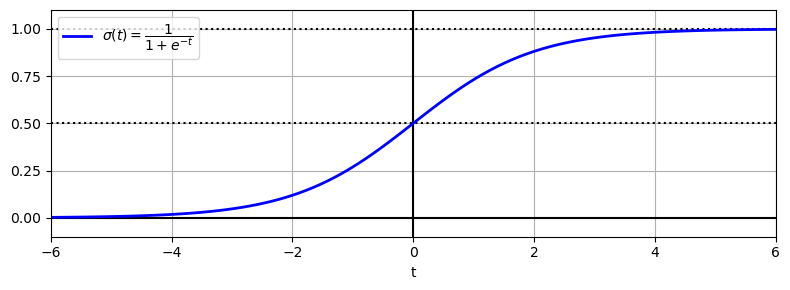

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

In [20]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [21]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
iris.target.head(3) # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int32

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

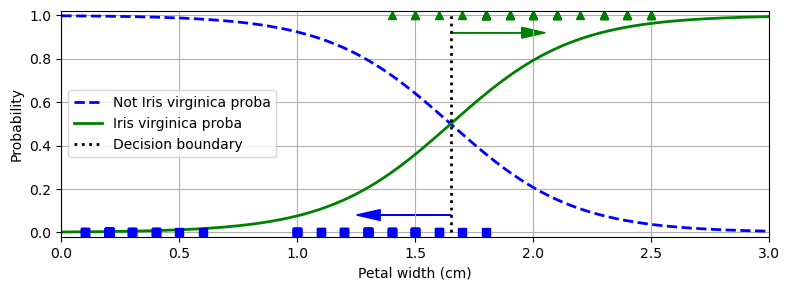

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [26]:
decision_boundary

1.6516516516516517

In [27]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

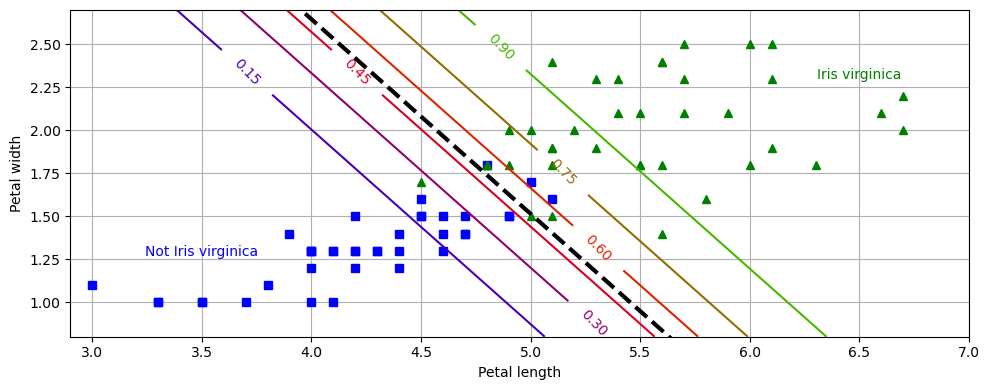

In [28]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

[返回](readme.md)